# Background

The dataset includes patient's medical examination details and hospitalization costs. The analysis covers retreiving the data sets,data manipulation, computaion and vizualization. 
The objective is to predict patients' healthcare costs and identify contributing factors. 
It is also important to understand the interdependencies of different factors 
The project objective is to predict patients' healthcare costs and identify contributing factors. 
It is also important to understand the interdependencies of different factors 
and recognize the significance of various tools at different stages of the healthcare cost Hospitalisation details prediction process.


Goal
A significant public health concern revolves around the escalating cost of healthcare. Thus, it becomes crucial to predict future costs and comprehend their root causes thoroughly.Healthcare insurance providers can employ this analysis to inform a range of strategic and tactical decisions

This notebook covers
1. Data set prep:  merge to combine datasets into a dataframe for ease of use
2. Data cleansing 
    removing records with missing data
    deriving relevent data elementse.g patients' age based on date of birth provied
    using appropriate transformation methods to address nominal and ordinal categorical variables
    Derving patients gender based on the suffice used in the name column since gender could be one of key features impacting 
    hospitalization costs.
    Data evaluation if we need to data balancing techniques
3. Data Vizualization
   Box plots to identify outliers 
   Histograms to undertstand the distribution of data
   Heat map for correlation
   Key finding Patient's smoking habit, BMI, Age and hospitalization tier significantly impacting 
   hospitalization charges.
  

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [11]:
#load all the files

filepath1 = 'C://Users//sahas//OneDrive//Documents//Caltech course work//Final Cap stone project//Hospitalisation details.csv'


df1 = pd.read_csv(filepath1, header =0, sep = ',')
df1

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013
...,...,...,...,...,...,...,...,...,...
2338,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012
2339,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024
2340,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012
2341,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013


In [12]:
filepath2 = 'C://Users//sahas//OneDrive//Documents//Caltech course work//Final Cap stone project//Medical Examinations.csv'

df2 = pd.read_csv(filepath2, header =0, sep = ',')
df2

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes
...,...,...,...,...,...,...,...,...
2330,Id2331,22.340,5.57,No,No,No,1,No
2331,Id2332,17.700,6.28,No,No,No,1,No
2332,Id2333,16.470,6.35,No,No,Yes,1,No
2333,Id2334,17.600,4.39,No,No,No,1,No


In [13]:
filepath3 = 'C://Users//sahas//OneDrive//Documents//Caltech course work//Final Cap stone project//Names.xlsx'

df3 = pd.read_excel(filepath3, header =0)
df3

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"
...,...,...
2330,Id2331,"Brietzke, Mr. Jordan"
2331,Id2332,"Riveros Gonzalez, Mr. Juan D. Sr."
2332,Id2333,"Albano, Ms. Julie"
2333,Id2334,"Rosendahl, Mr. Evan P"


In [14]:
# describing data for df

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    2343 non-null   object 
 1   year           2343 non-null   object 
 2   month          2343 non-null   object 
 3   date           2343 non-null   int64  
 4   children       2343 non-null   int64  
 5   charges        2343 non-null   float64
 6   Hospital tier  2343 non-null   object 
 7   City tier      2343 non-null   object 
 8   State ID       2343 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 164.9+ KB


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   BMI                     2335 non-null   float64
 2   HBA1C                   2335 non-null   float64
 3   Heart Issues            2335 non-null   object 
 4   Any Transplants         2335 non-null   object 
 5   Cancer history          2335 non-null   object 
 6   NumberOfMajorSurgeries  2335 non-null   object 
 7   smoker                  2335 non-null   object 
dtypes: float64(2), object(6)
memory usage: 146.1+ KB


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  2335 non-null   object
 1   name         2335 non-null   object
dtypes: object(2)
memory usage: 36.6+ KB


In [17]:
df4 =pd.merge(df2, df3, on  ="Customer ID")

df4

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id1,47.410,7.47,No,No,No,No major surgery,yes,"Hawks, Ms. Kelly"
1,Id2,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"
2,Id3,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
3,Id4,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
4,Id5,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
...,...,...,...,...,...,...,...,...,...
2330,Id2331,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
2331,Id2332,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
2332,Id2333,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
2333,Id2334,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"


In [18]:
#about 8 records from the hospitalisation details do not have corresponding medcical examination and names info.
#hence those recrods are not included in the merged table. Since the record count is very low these records are ignored.
Merged_info =pd.merge(df1, df4, on  ="Customer ID")

Merged_info

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"


In [19]:
Merged_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

# Data Science 3 -Data cleanup
##Determine the percentage of rows containing trivial values (for example, ?) and eliminate rows 
##lacking significant information

In [21]:
Merged_info['year'].value_counts()

year
2004    98
2003    85
1988    60
1972    60
1974    57
1970    57
1975    56
1976    55
1994    55
1971    55
2002    55
1992    55
1997    55
1969    54
1981    53
1995    53
1993    53
1978    51
1979    51
1965    51
1999    51
1985    50
1982    50
1962    50
2001    49
1968    49
1991    49
1966    48
1990    48
1963    48
1980    47
1998    47
1984    46
2000    46
1973    45
1983    45
1964    45
1989    45
1996    44
1967    44
1977    43
1986    43
1987    41
1961    23
1960    23
1959    23
1958    22
?        2
Name: count, dtype: int64

In [22]:
Merged_info['year'].value_counts()

year
2004    98
2003    85
1988    60
1972    60
1974    57
1970    57
1975    56
1976    55
1994    55
1971    55
2002    55
1992    55
1997    55
1969    54
1981    53
1995    53
1993    53
1978    51
1979    51
1965    51
1999    51
1985    50
1982    50
1962    50
2001    49
1968    49
1991    49
1966    48
1990    48
1963    48
1980    47
1998    47
1984    46
2000    46
1973    45
1983    45
1964    45
1989    45
1996    44
1967    44
1977    43
1986    43
1987    41
1961    23
1960    23
1959    23
1958    22
?        2
Name: count, dtype: int64

In [23]:
Merged_info.columns

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history',
       'NumberOfMajorSurgeries', 'smoker', 'name'],
      dtype='object')

In [24]:
columns = ['children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history','NumberOfMajorSurgeries','smoker']

for c in columns:
    unique_counts = Merged_info[c].value_counts()
    print(f'{c}: {unique_counts}')

    
## columns with special characters Hospital tier, city tier,state_id, smoker )
##NumberOfMajorSurgeries ( need to label No major surgeries as 0)

children: children
0    1189
1     379
3     378
2     346
4      25
5      18
Name: count, dtype: int64
charges: charges
1304.00     2
650.00      2
760.00      2
1639.56     2
13430.27    1
           ..
6548.20     1
6551.75     1
6552.01     1
6555.07     1
63770.43    1
Name: count, Length: 2331, dtype: int64
Hospital tier: Hospital tier
tier - 2    1337
tier - 3     693
tier - 1     304
?              1
Name: count, dtype: int64
City tier: City tier
tier - 2    808
tier - 3    794
tier - 1    732
?             1
Name: count, dtype: int64
State ID: State ID
R1013    612
R1012    575
R1011    574
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     12
R1018      9
R1020      6
?          2
Name: count, dtype: int64
BMI: BMI
32.300    13
25.460     9
28.310     9
30.875     8
31.350     8
          ..
36.690     1
19.350     1
40.120     1
17.780     1
47.410     1
Name: count, Length: 1335, dtype

In [25]:
Merged_info.describe()

,date,children,charges,BMI,HBA1C
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


In [26]:
condition= (Merged_info ['Heart Issues'] =='yes') & (Merged_info['NumberOfMajorSurgeries'] != 0 )


filtered_df = Merged_info[condition]
filtered_df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
5,Id2330,2001,Nov,20,0,646.14,tier - 3,tier - 3,R1012,22.240,4.29,yes,No,No,No major surgery,No,"Kohls, Ms. Katy"
7,Id2328,1995,Jul,4,0,650.00,tier - 3,tier - 3,R1013,17.820,5.26,yes,No,No,1,No,"Avery, Ms. Nicole"
9,Id2326,1997,Nov,9,0,670.00,tier - 3,tier - 3,R1013,20.100,5.60,yes,No,Yes,1,No,"Castro, Mr. Sebastian"
10,Id2325,2001,Sep,12,0,687.54,tier - 3,tier - 2,R1013,24.760,4.54,yes,No,No,No major surgery,No,"Hines, Mr. Fred"
15,Id2320,1996,Oct,22,0,760.00,tier - 3,tier - 3,R1013,19.210,5.53,yes,No,No,No major surgery,No,"Graves - Rostro, Ms. Lindy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,Id18,1963,Aug,5,1,47896.79,tier - 1,tier - 3,R1024,36.765,7.29,yes,No,Yes,1,yes,"Noordstar, Ms. Christina M."
2320,Id15,1961,Dec,21,1,48517.56,tier - 1,tier - 3,R1024,36.385,7.59,yes,No,No,2,yes,"Rios, Ms. Leilani M."
2324,Id11,1959,Jul,22,0,48824.45,tier - 2,tier - 1,R1011,37.700,5.96,yes,No,No,2,yes,"Fierro Vargas, Ms. Paola Andrea"
2326,Id9,1963,Sep,4,1,48970.25,tier - 1,tier - 2,R1013,41.140,9.58,yes,No,Yes,1,yes,"Moran, Mr. Patrick R."


#since the missing data count is very low and largely immaterial. We will default the missing values with Max value 
#Year =1988 ( max count of  patients with heart issues and major surgeries >0 belong to 1988 hence using 1988 as defaul  )
#Hospital tier = tier - 2
#city tier = tier - 2
#state_id = R1013 
#smoker - No

In [28]:
data6= Merged_info [Merged_info['year']=='?']

data6

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
1046,Id1289,?,Jul,24,0,8534.67,tier - 2,tier - 3,R1024,24.32,11.56,yes,No,No,1,No,"Levine, Ms. Annie J."
1049,Id1286,?,Dec,12,1,8547.69,tier - 2,tier - 1,R1013,29.37,8.01,yes,No,No,1,No,"Ainsley, Ms. Katie M."


In [29]:
Merged_info['year'] =Merged_info['year'].str.replace('?','1988')

In [30]:
Merged_info['year'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1992
1       1992
2       1993
3       1992
4       1998
        ... 
2330    1989
2331    1991
2332    1970
2333    1977
2334    1968
Name: year, Length: 2335, dtype: object>

In [31]:
Merged_info['Hospital tier'] =Merged_info['Hospital tier'].str.replace('?','tier - 2')

In [32]:
Merged_info['City tier'] =Merged_info['City tier'].str.replace('?','tier - 2')

In [33]:
Merged_info['State ID'] =Merged_info['State ID'].str.replace('?','R1013')

In [34]:
Merged_info['smoker'] =Merged_info['smoker'].str.replace('?','No')

In [35]:
columns = ['children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history','NumberOfMajorSurgeries','smoker']

for c in columns:
    unique_counts = Merged_info[c].value_counts()
    print(f'{c}: {unique_counts}')

children: children
0    1189
1     379
3     378
2     346
4      25
5      18
Name: count, dtype: int64
charges: charges
1304.00     2
650.00      2
760.00      2
1639.56     2
13430.27    1
           ..
6548.20     1
6551.75     1
6552.01     1
6555.07     1
63770.43    1
Name: count, Length: 2331, dtype: int64
Hospital tier: Hospital tier
tier - 2    1338
tier - 3     693
tier - 1     304
Name: count, dtype: int64
City tier: City tier
tier - 2    809
tier - 3    794
tier - 1    732
Name: count, dtype: int64
State ID: State ID
R1013    614
R1012    575
R1011    574
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     12
R1018      9
R1020      6
Name: count, dtype: int64
BMI: BMI
32.300    13
25.460     9
28.310     9
30.875     8
31.350     8
          ..
36.690     1
19.350     1
40.120     1
17.780     1
47.410     1
Name: count, Length: 1335, dtype: int64
HBA1C: HBA1C
5.84     15
4.36     14
5

In [36]:
Merged_info.describe()

,date,children,charges,BMI,HBA1C
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


#Data Science 4. Employ appropriate transformation methods to address nominal and ordinal categorical variables 
##in the dataset

In [38]:
Merged_info['smoker'] = Merged_info['smoker'].map({'yes': 1, 'No': 0})

In [39]:
Merged_info['Cancer history'] = Merged_info['Cancer history'].map({'Yes': 1, 'No': 0})

In [40]:
Merged_info['Any Transplants'] = Merged_info['Any Transplants'].map({'yes': 1, 'No': 0})

In [41]:
Merged_info['Heart Issues'] = Merged_info['Heart Issues'].map({'yes': 1, 'No': 0})

In [42]:
Merged_info['Hospital tier'] = Merged_info['Hospital tier'].map({'tier - 2': 2, 'tier - 1': 1, 'tier - 3':3})

In [43]:
Merged_info['City tier'] = Merged_info['City tier'].map({'tier - 2': 2, 'tier - 1': 1, 'tier - 3':3})

#Data science 6
 #6. The variable NumberOfMajorSurgeries seems to contain string values. Implement an appropriate 
#method to rectify this variable

In [44]:
Merged_info['NumberOfMajorSurgeries'] = Merged_info['NumberOfMajorSurgeries'].replace('No major surgery', 0)

In [45]:
columns = ['children', 'charges',
       'Hospital tier', 'City tier', 'State ID', 'BMI', 'HBA1C',
       'Heart Issues', 'Any Transplants', 'Cancer history','NumberOfMajorSurgeries','smoker']

for c in columns:
    unique_counts = Merged_info[c].value_counts()
    print(f'{c}: {unique_counts}')

children: children
0    1189
1     379
3     378
2     346
4      25
5      18
Name: count, dtype: int64
charges: charges
1304.00     2
650.00      2
760.00      2
1639.56     2
13430.27    1
           ..
6548.20     1
6551.75     1
6552.01     1
6555.07     1
63770.43    1
Name: count, Length: 2331, dtype: int64
Hospital tier: Hospital tier
2    1338
3     693
1     304
Name: count, dtype: int64
City tier: City tier
2    809
3    794
1    732
Name: count, dtype: int64
State ID: State ID
R1013    614
R1012    575
R1011    574
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     12
R1018      9
R1020      6
Name: count, dtype: int64
BMI: BMI
32.300    13
25.460     9
28.310     9
30.875     8
31.350     8
          ..
36.690     1
19.350     1
40.120     1
17.780     1
47.410     1
Name: count, Length: 1335, dtype: int64
HBA1C: HBA1C
5.84     15
4.36     14
5.19     14
6.29     14
5.51     13
       

##Data Science  5. The dataset includes State ID, representing approximately 16 states. However, these states are not 
##equally represented. To avoid an excessive number of insignificant predictors, particularly considering 
##R1011, R1012, and R1013 are of interest, develop a suitable strategy for creating dummy variables 
##within these constraints.

In [47]:
Merged_info['State ID'].value_counts()

State ID
R1013    614
R1012    575
R1011    574
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     12
R1018      9
R1020      6
Name: count, dtype: int64

In [48]:
Df =Merged_info[Merged_info['State ID'].isin( ['R1013','R1012', 'R1011'])]

Df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,Aug,4,0,52590.83,1,3,R1011,32.800,6.59,0,0,0,0,1,"Baker, Mr. Russell B."
2330,Id5,1989,Jun,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn"
2332,Id3,1970,?,11,3,60021.40,1,1,R1012,34.485,11.87,1,0,0,2,1,"Lu, Mr. Phil"
2333,Id2,1977,Jun,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D"


Age proves to be a crucial variable in this analysis. Compute patients' ages based on their dates of birth.


In [49]:
Merged_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   int64  
 7   City tier               2335 non-null   int64  
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   int64  
 12  Any Transplants         2335 non-null   int64  
 13  Cancer history          2335 non-null   int64  
 14  NumberOfMajorSurgeries  2335 non-null   

In [50]:
from datetime import date

In [51]:
Merged_info['year'] =Merged_info['year'].astype('int')

In [52]:
currentyear = date.today().year
Merged_info['Age'] = Merged_info['year'].apply(lambda x: currentyear - x)

In [53]:
Merged_info

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K",32
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",32
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie",31
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",32
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn",35
2331,Id4,1991,Jun,6,1,58571.07,1,3,R1024,38.095,6.05,0,0,0,0,1,"Osborne, Ms. Kelsey",33
2332,Id3,1970,?,11,3,60021.40,1,1,R1012,34.485,11.87,1,0,0,2,1,"Lu, Mr. Phil",54
2333,Id2,1977,Jun,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D",47


In [54]:
Merged_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   int32  
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   int64  
 7   City tier               2335 non-null   int64  
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   int64  
 12  Any Transplants         2335 non-null   int64  
 13  Cancer history          2335 non-null   int64  
 14  NumberOfMajorSurgeries  2335 non-null   

#The patient's gender might significantly influence the hospitalization expenses. Use the salutations 
#in a beneficiary's name to identify their gender. Establish a new field to capture the beneficiary's 
#gender.

In [55]:
Merged_info['name']

0                     German, Mr.  Aaron K
1                   Rosendahl, Mr.  Evan P
2                       Albano, Ms.  Julie
3       Riveros Gonzalez, Mr.  Juan D. Sr.
4                    Brietzke, Mr.  Jordan
                       ...                
2330                  Kadala, Ms.  Kristyn
2331                  Osborne, Ms.  Kelsey
2332                         Lu, Mr.  Phil
2333                Lehner, Mr.  Matthew D
2334                     Hawks, Ms.  Kelly
Name: name, Length: 2335, dtype: object

In [56]:
def determine_gender(name):
    if 'Mr.' in name:
        return '1'
    elif 'Ms.' in name or 'Mrs.' in name:
        return '2'
    else:
        return np.nan

    
Merged_info['Gender'] = Merged_info['name'].apply (determine_gender)

Merged_info

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age,Gender
0,Id2335,1992,Jul,9,0,563.84,2,3,R1013,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K",32,1
1,Id2334,1992,Nov,30,0,570.62,2,1,R1013,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",32,1
2,Id2333,1993,Jun,30,0,600.00,2,1,R1013,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie",31,2
3,Id2332,1992,Sep,13,0,604.54,3,3,R1013,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",32,1
4,Id2331,1998,Jul,27,0,637.26,3,3,R1013,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,1,2,R1012,35.530,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn",35,2
2331,Id4,1991,Jun,6,1,58571.07,1,3,R1024,38.095,6.05,0,0,0,0,1,"Osborne, Ms. Kelsey",33,2
2332,Id3,1970,?,11,3,60021.40,1,1,R1012,34.485,11.87,1,0,0,2,1,"Lu, Mr. Phil",54,1
2333,Id2,1977,Jun,8,0,62592.87,2,3,R1013,30.360,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D",47,1


In [57]:
Merged_info['Gender'].value_counts()

Gender
2    1170
1    1165
Name: count, dtype: int64

#develop a suitable strategy for creating dummy variables 
#within these constraints.we could use the SMOTE technique for fixing the sampling issues

In [58]:
Merged_info['State ID'].value_counts()

State ID
R1013    614
R1012    575
R1011    574
R1024    160
R1026     84
R1021     70
R1016     64
R1025     40
R1023     38
R1017     36
R1019     26
R1022     14
R1014     13
R1015     12
R1018      9
R1020      6
Name: count, dtype: int64

In [59]:
#Since we need to focus on data from 'R1013','R1012', 'R1011' states. lets create a dataframe for this data set

Df =Merged_info[Merged_info['State ID'].isin( ['R1013','R1012', 'R1011'])]

In [60]:
Df['State ID'].value_counts()

State ID
R1013    614
R1012    575
R1011    574
Name: count, dtype: int64

In [61]:
Df['State ID'] = Df['State ID'].map({'R1013': 3, 'R1012': 2, 'R1011':1})

C:\Users\sahas\AppData\Local\Temp\ipykernel_11200\2655123907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['State ID'] = Df['State ID'].map({'R1013': 3, 'R1012': 2, 'R1011':1})


In [62]:
Df['State ID'].value_counts()

State ID
3    614
2    575
1    574
Name: count, dtype: int64

#the number of counts for top three states seems to be resonably close. Hence we don't need to using data balancing techniques

In [64]:
# now lets work on data visualization to understand the data distribution.

In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

In [66]:
##9. Represent the cost distribution through a histogram, a box and whisker plot, and a 
#swarm plot.
#10. Specify the variations in the distribution across genders and hospital tiers
# 11. Develop a radar chart illustrating the median hospitalization cost for each hospital tier
# 12. Construct a frequency table and a stacked bar chart to visualize the population counts across 
# different city and hospital tiers


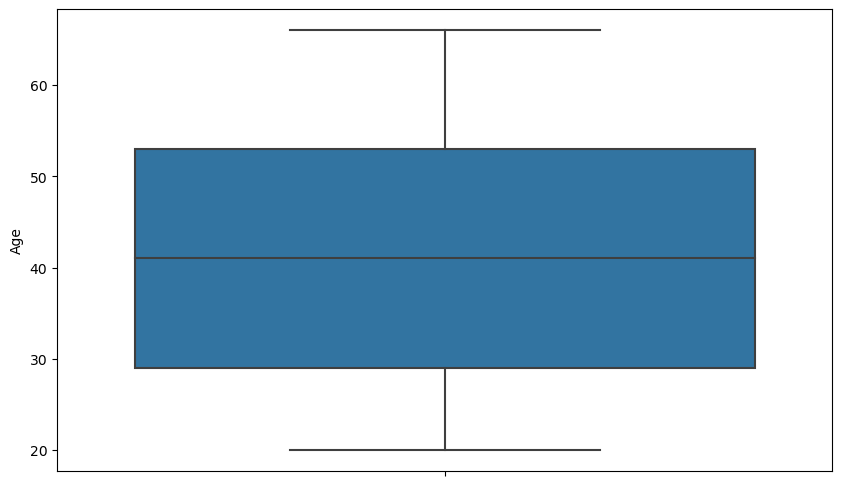

In [67]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='Age', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

In [61]:
Df['NumberOfMajorSurgeries'] =Df['NumberOfMajorSurgeries'].astype('int')
Df['Gender'] =Df['Gender'].astype('int')

Df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 0 to 2334
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1763 non-null   object 
 1   year                    1763 non-null   int32  
 2   month                   1763 non-null   object 
 3   date                    1763 non-null   int64  
 4   children                1763 non-null   int64  
 5   charges                 1763 non-null   float64
 6   Hospital tier           1763 non-null   int64  
 7   City tier               1763 non-null   int64  
 8   State ID                1763 non-null   object 
 9   BMI                     1763 non-null   float64
 10  HBA1C                   1763 non-null   float64
 11  Heart Issues            1763 non-null   int64  
 12  Any Transplants         1763 non-null   int64  
 13  Cancer history          1763 non-null   int64  
 14  NumberOfMajorSurgeries  1763 non-null   int32

C:\Users\sahas\AppData\Local\Temp\ipykernel_40984\3456803372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['NumberOfMajorSurgeries'] =Df['NumberOfMajorSurgeries'].astype('int')
C:\Users\sahas\AppData\Local\Temp\ipykernel_40984\3456803372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Gender'] =Df['Gender'].astype('int')


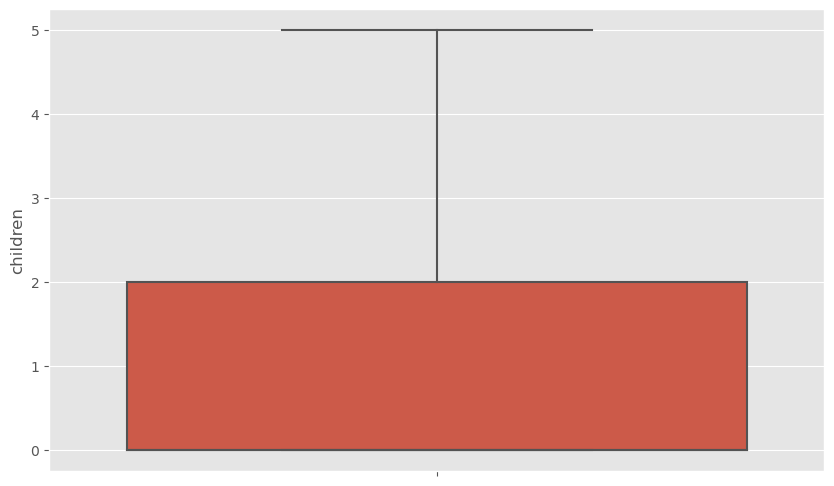

In [62]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='children', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

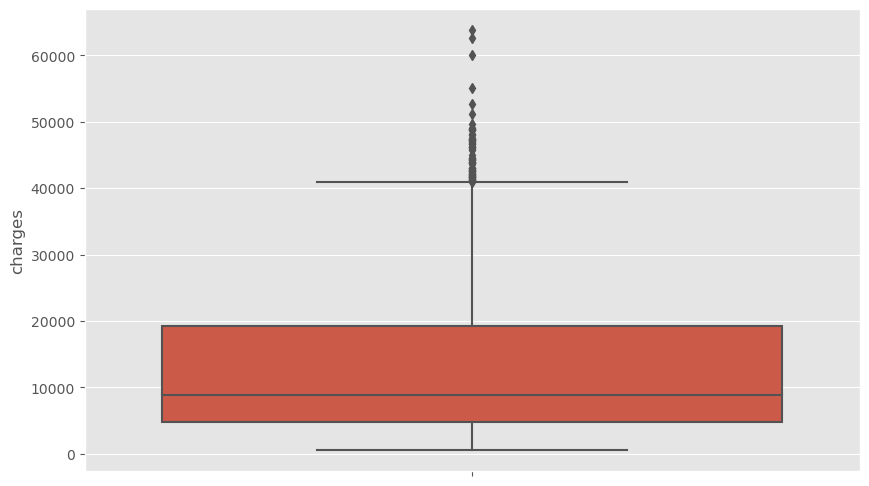

In [63]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='charges', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

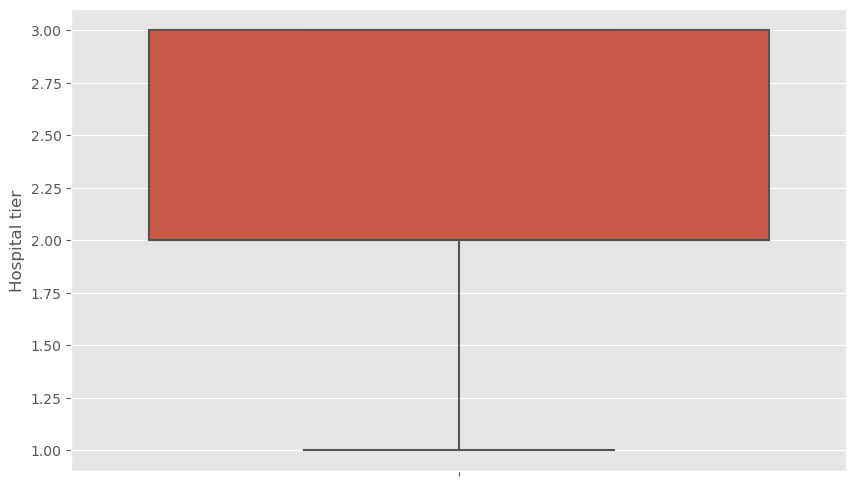

In [64]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='Hospital tier', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

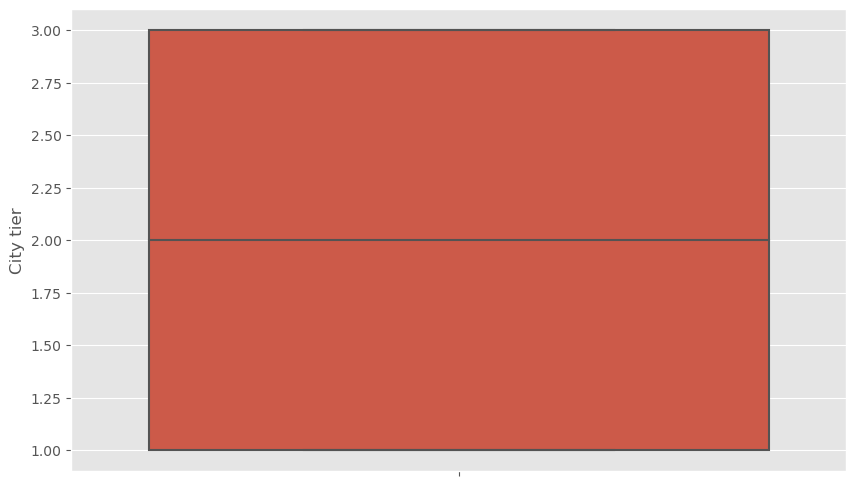

In [65]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='City tier', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

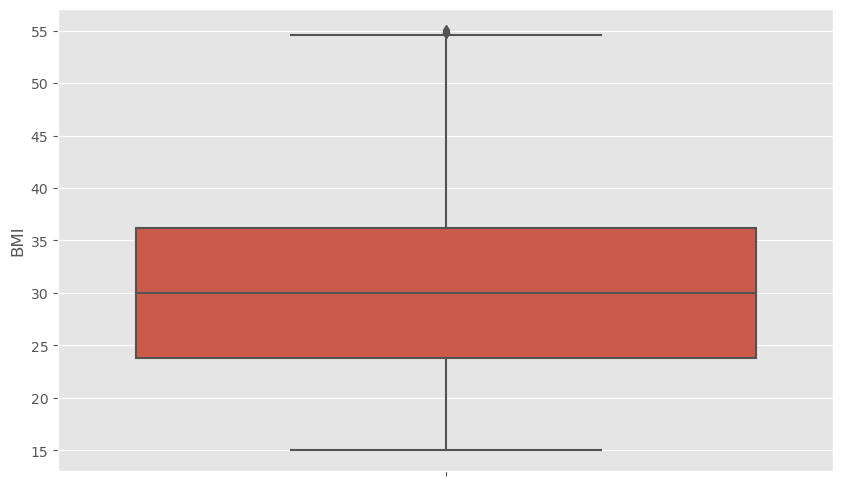

In [66]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='BMI', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

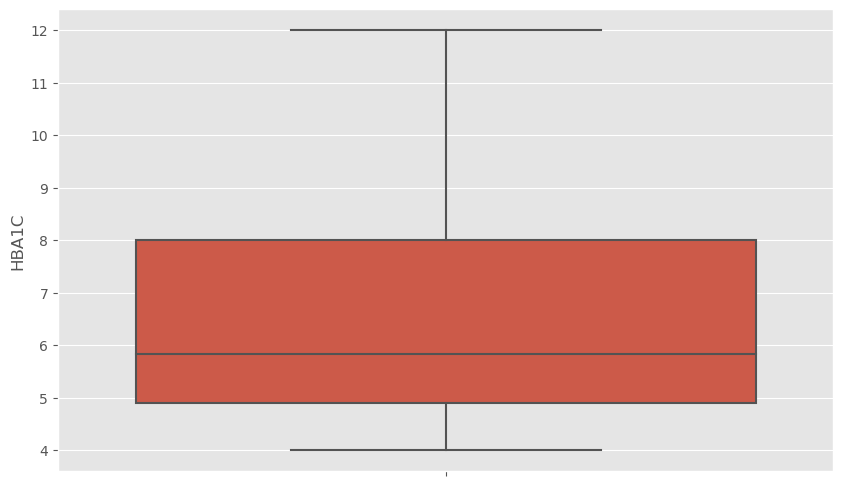

In [67]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='HBA1C', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

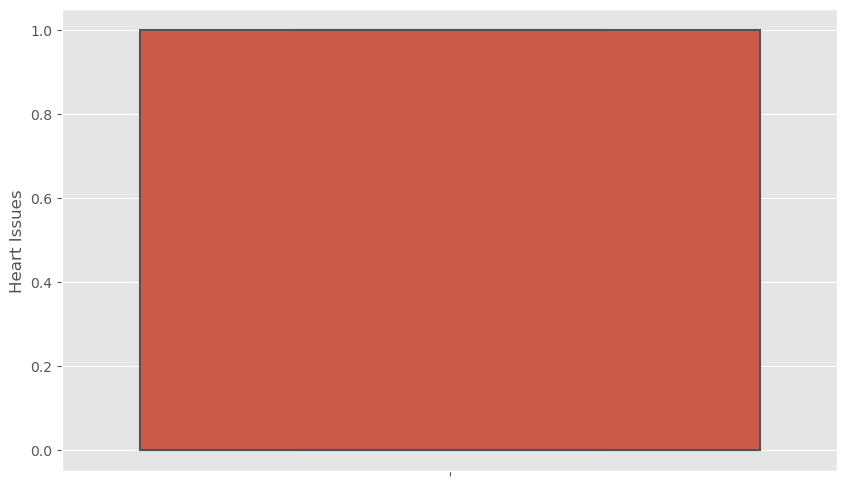

In [68]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='Heart Issues', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

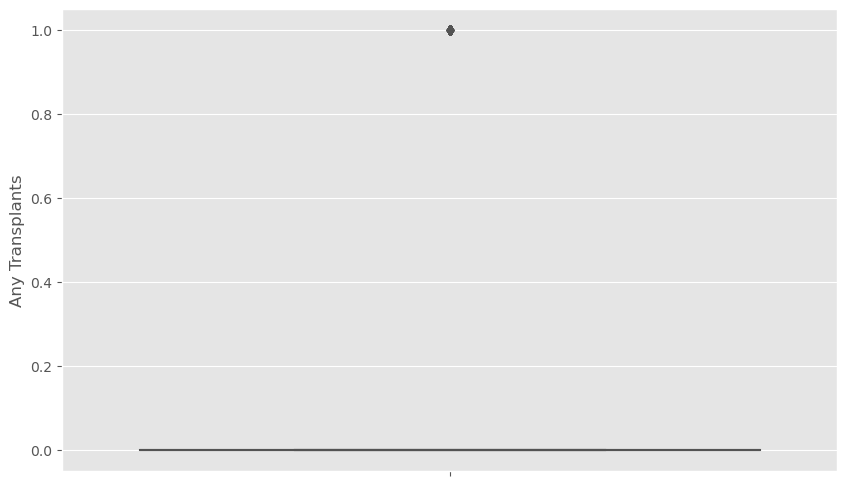

In [69]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='Any Transplants', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

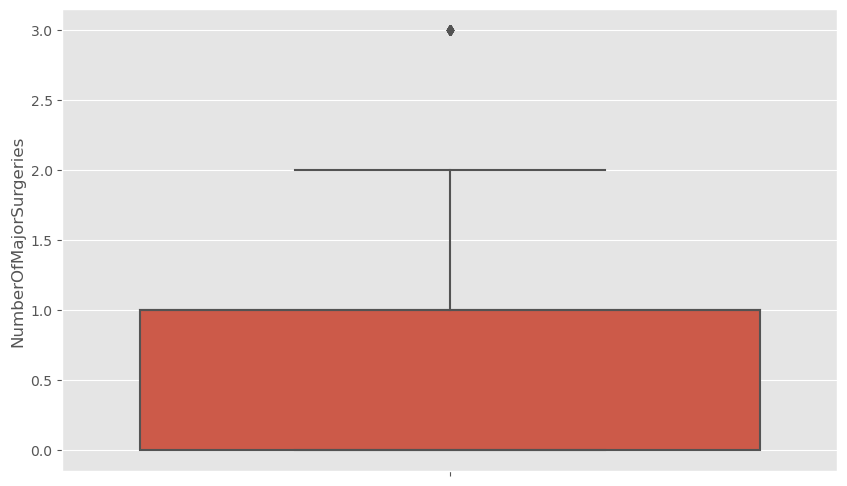

In [70]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='NumberOfMajorSurgeries', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

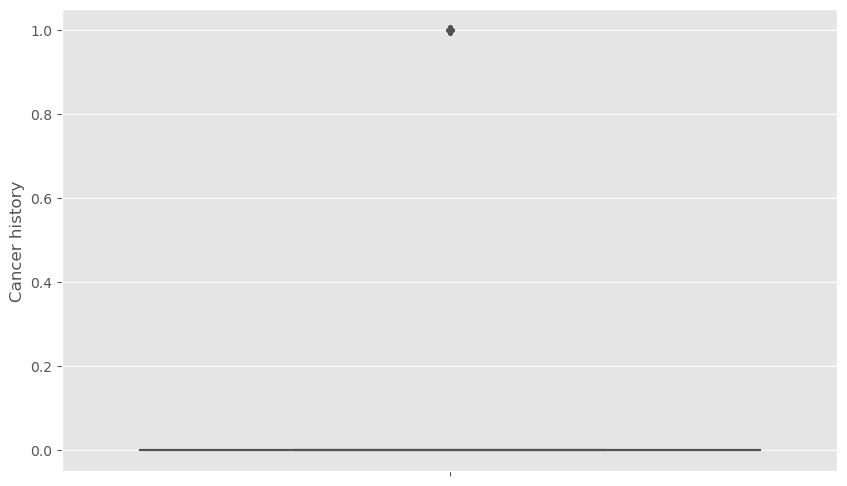

In [71]:


# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='Cancer history', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

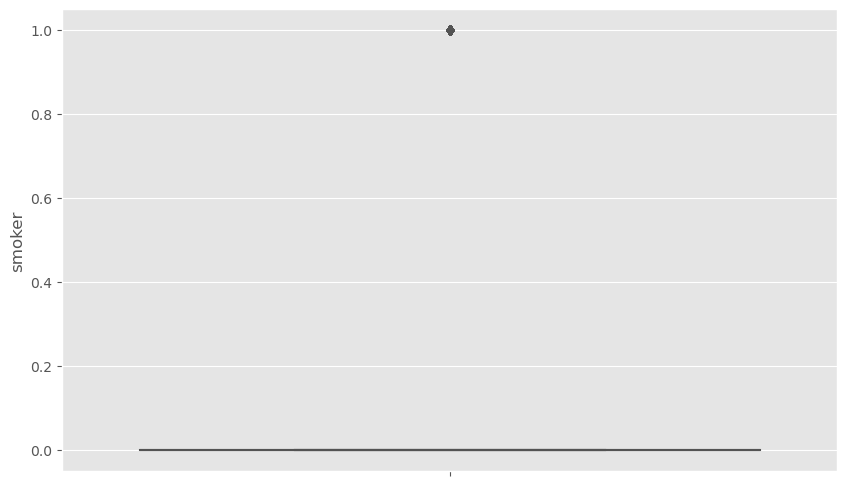

In [72]:

# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='smoker', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

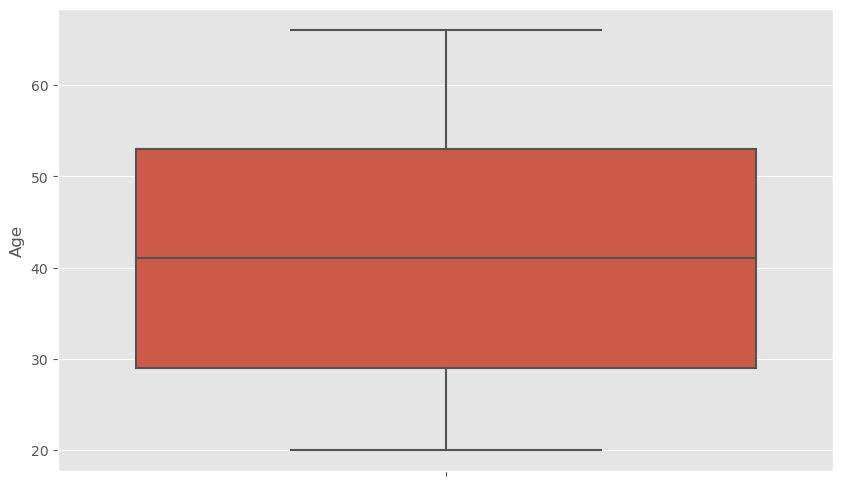

In [73]:
# Increase figure size
plt.figure(figsize=(10, 6))

# Adjust x-axis label orientation
sns.boxplot(y='Age', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Increase x-axis label font size
plt.xticks(fontsize=10)

# Show plot
plt.show()

In [74]:
#lets looks at data dsitribution over different parameters

Df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 0 to 2334
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1763 non-null   object 
 1   year                    1763 non-null   int32  
 2   month                   1763 non-null   object 
 3   date                    1763 non-null   int64  
 4   children                1763 non-null   int64  
 5   charges                 1763 non-null   float64
 6   Hospital tier           1763 non-null   int64  
 7   City tier               1763 non-null   int64  
 8   State ID                1763 non-null   object 
 9   BMI                     1763 non-null   float64
 10  HBA1C                   1763 non-null   float64
 11  Heart Issues            1763 non-null   int64  
 12  Any Transplants         1763 non-null   int64  
 13  Cancer history          1763 non-null   int64  
 14  NumberOfMajorSurgeries  1763 non-null   int32

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

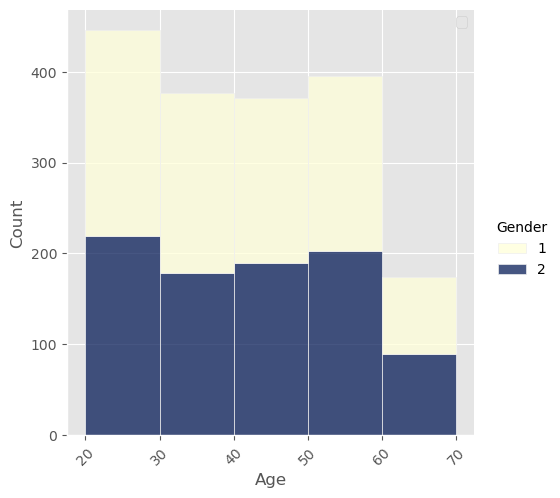

In [75]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='Age', hue='Gender', bins= range(20,80,10) , palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

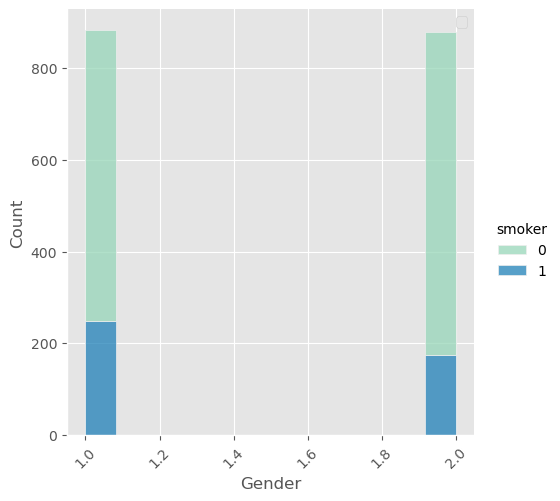

In [76]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='Gender', hue='smoker' , palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

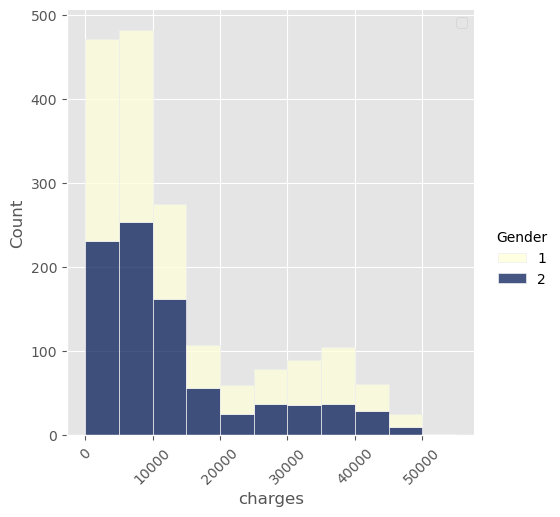

In [77]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='charges', hue='Gender' , bins = range(0,60000,5000), palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


TypeError: 'str' object is not callable

<Figure size 500x300 with 0 Axes>

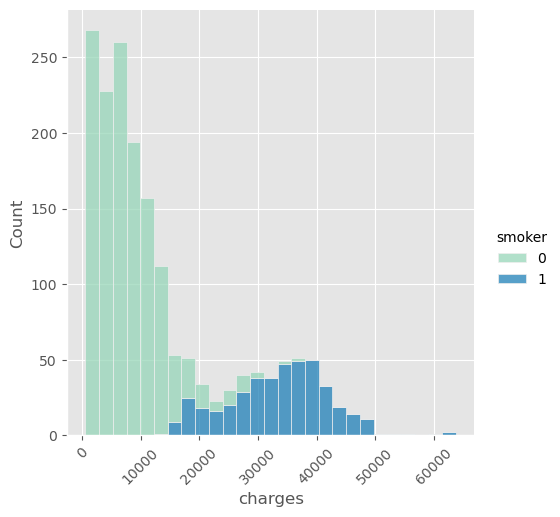

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Df is already defined and contains your data

plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

# Create the bar plot
sns.displot(x='charges',hue ='smoker', palette='YlGnBu', data=Df, multiple='stack')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Increase x-axis label font size
plt.xticks(fontsize=10)

# Add the title
plt.title('Hospitalization Costs and Patients Smoking Habits')

# Adjust layout
plt.tight_layout()

# Add legend
plt.legend()

# Show plot
plt.show()


C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

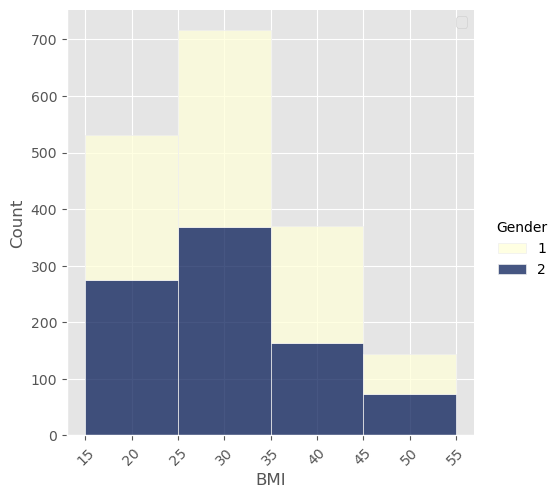

In [79]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='BMI' ,hue='Gender', bins= range(15,60,10), palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

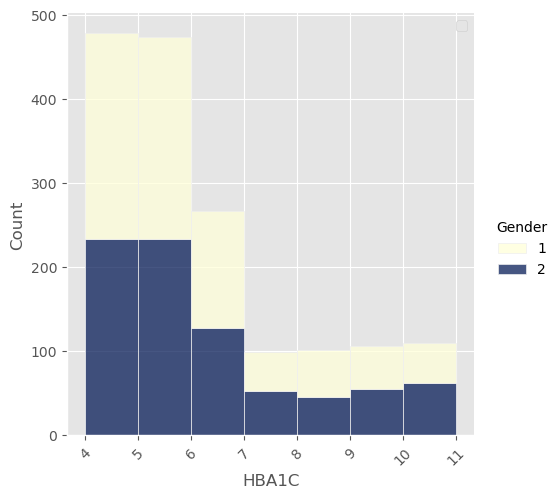

In [80]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='HBA1C' ,hue='Gender', bins= range(4,12,1), palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

In [81]:
Df.corr(numeric_only = True)


,year,date,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,Gender
year,1.000000,-0.023570,-0.007958,-0.295568,-0.124485,0.009084,-0.045376,-0.454908,-0.192566,0.347028,0.139732,-0.164048,-0.023641,-1.000000,-0.015681
date,-0.023570,1.000000,0.009682,0.003136,-0.009326,-0.031072,0.038549,0.062092,0.004303,-0.018146,-0.019665,-0.022195,-0.006248,0.023570,-0.023407
children,-0.007958,0.009682,1.000000,0.057237,-0.101948,-0.035183,-0.004277,-0.112835,0.016698,-0.134385,-0.025274,-0.099089,0.021261,0.007958,-0.019688
charges,-0.295568,0.003136,0.057237,1.000000,-0.473348,0.033560,0.386747,0.138142,0.053053,-0.097251,-0.031429,0.075068,0.861247,0.295568,-0.075707
Hospital tier,-0.124485,-0.009326,-0.101948,-0.473348,1.000000,-0.037119,-0.134105,0.057166,0.040175,0.025930,-0.022777,0.021885,-0.496286,0.124485,0.015907
City tier,0.009084,-0.031072,-0.035183,0.033560,-0.037119,1.000000,0.043549,-0.013724,0.020720,0.017817,-0.013935,0.032380,0.038066,-0.009084,-0.081421
BMI,-0.045376,0.038549,-0.004277,0.386747,-0.134105,0.043549,1.000000,-0.016001,0.020774,0.044571,-0.022002,0.048623,0.177655,0.045376,-0.032872
HBA1C,-0.454908,0.062092,-0.112835,0.138142,0.057166,-0.013724,-0.016001,1.000000,-0.000277,-0.148564,-0.180868,-0.085971,0.017946,0.454908,0.034294
Heart Issues,-0.192566,0.004303,0.016698,0.053053,0.040175,0.020720,0.020774,-0.000277,1.000000,-0.114937,0.101262,0.218212,-0.001934,0.192566,-0.012776
Any Transplants,0.347028,-0.018146,-0.134385,-0.097251,0.025930,0.017817,0.044571,-0.148564,-0.114937,1.000000,-0.106602,0.156306,-0.021009,-0.347028,0.000673


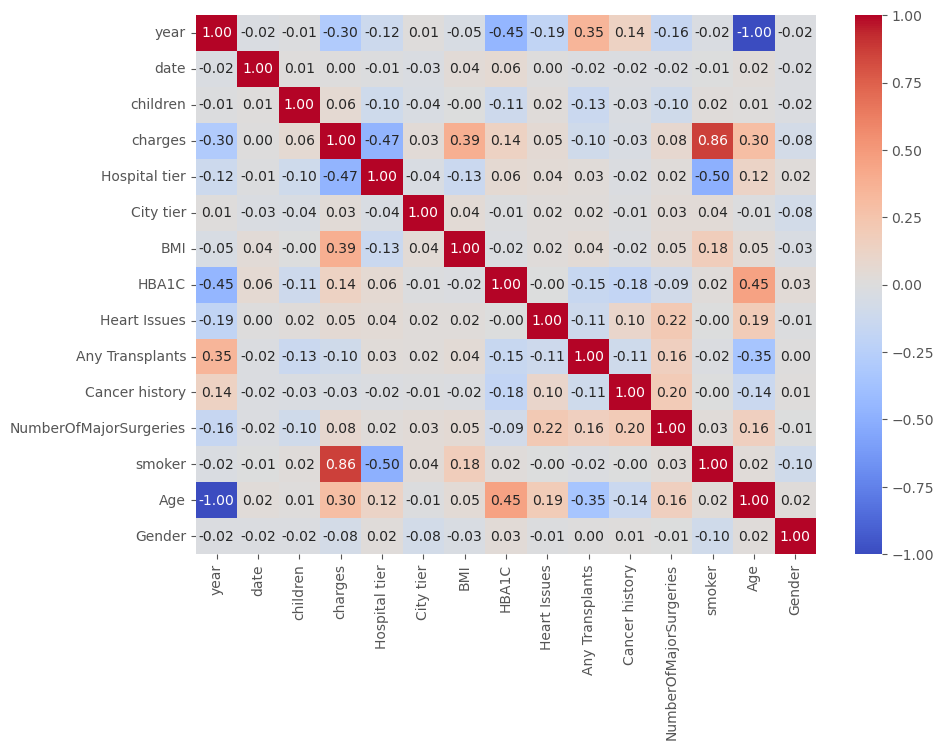

In [82]:
correlation_testdata = Df.corr(numeric_only = True)
from matplotlib import pyplot as plt
import seaborn as sns
corelation_matrix = Df.corr(numeric_only=True)
plt.figure(figsize =(10,7))
heatmap = sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


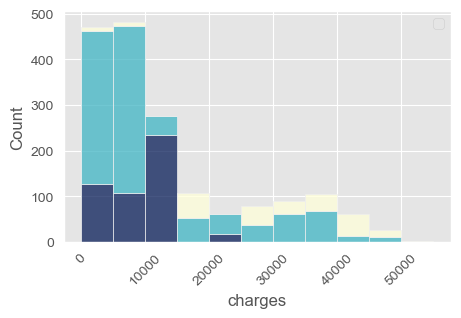

In [95]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.histplot(x='charges', hue='Hospital tier' , bins = range(0,60000,5000), palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


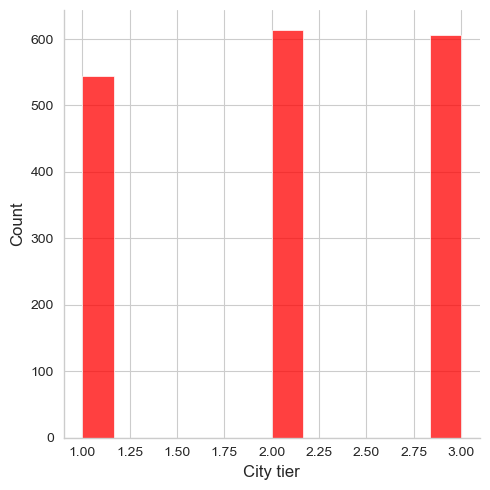

In [107]:
sns.set_style('whitegrid')
sns.displot(Df['City tier'], color ='red', kind ='hist')
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

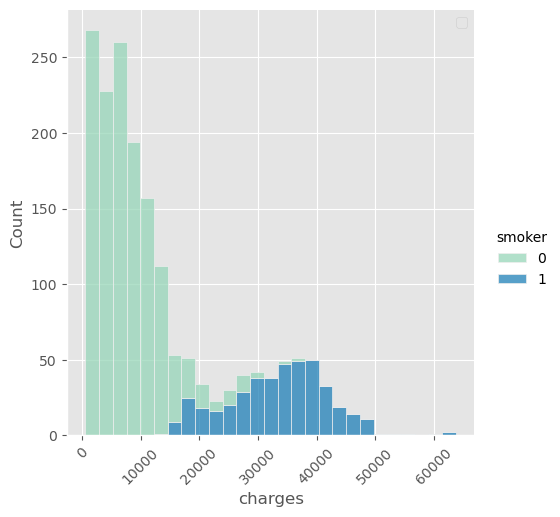

In [84]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='charges' , hue = 'smoker', palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

In [68]:
Df['BMI Category'] = Df['BMI']. apply (lambda x: 0 if x< 30 else 1)

Df

C:\Users\sahas\AppData\Local\Temp\ipykernel_11200\48219753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['BMI Category'] = Df['BMI']. apply (lambda x: 0 if x< 30 else 1)


,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age,Gender,BMI Category
0,Id2335,1992,Jul,9,0,563.84,2,3,3,17.580,4.51,0,0,0,1,0,"German, Mr. Aaron K",32,1,0
1,Id2334,1992,Nov,30,0,570.62,2,1,3,17.600,4.39,0,0,0,1,0,"Rosendahl, Mr. Evan P",32,1,0
2,Id2333,1993,Jun,30,0,600.00,2,1,3,16.470,6.35,0,0,1,1,0,"Albano, Ms. Julie",31,2,0
3,Id2332,1992,Sep,13,0,604.54,3,3,3,17.700,6.28,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",32,1,0
4,Id2331,1998,Jul,27,0,637.26,3,3,3,22.340,5.57,0,0,0,1,0,"Brietzke, Mr. Jordan",26,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,Aug,4,0,52590.83,1,3,1,32.800,6.59,0,0,0,0,1,"Baker, Mr. Russell B.",62,1,1
2330,Id5,1989,Jun,19,0,55135.40,1,2,2,35.530,5.45,0,0,0,0,1,"Kadala, Ms. Kristyn",35,2,1
2332,Id3,1970,?,11,3,60021.40,1,1,2,34.485,11.87,1,0,0,2,1,"Lu, Mr. Phil",54,1,1
2333,Id2,1977,Jun,8,0,62592.87,2,3,3,30.360,5.77,0,0,0,0,1,"Lehner, Mr. Matthew D",47,1,1


C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 500x300 with 0 Axes>

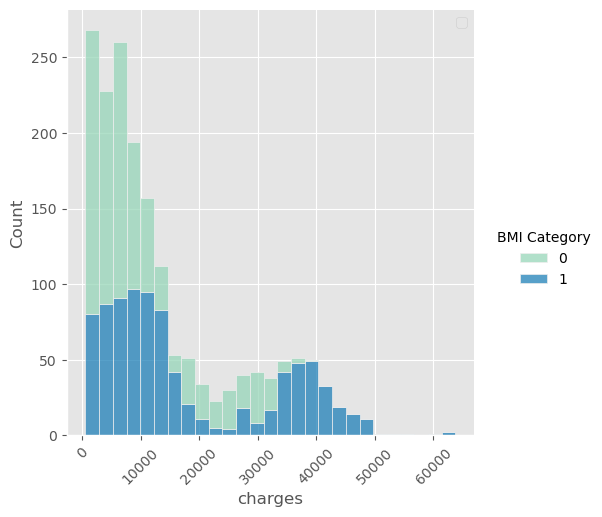

In [86]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.displot(x='charges' , hue = 'BMI Category', palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

In [ ]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')
agen_bins = range
sns.displot(x='charges' , hue = 'Age', palette ='YlGnBu', stat ='count',data=Df,multiple ='stack')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
# Increase x-axis label font size
plt.xticks(fontsize=10)
plt.tight_layout
plt.legend()
# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


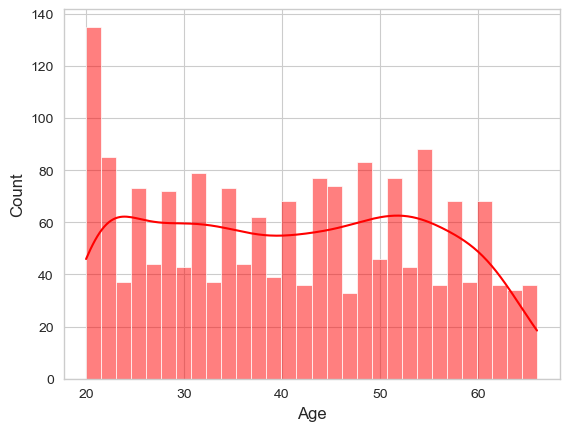

In [94]:
sns.set_style('whitegrid')
sns.histplot(Df['Age'], kde = True, color ='red', bins = 30, stat ='count')
plt.show()

In [80]:
Df['age_groups'] = pd.cut(Df['Age'], bins=range(0,81,10))

C:\Users\sahas\AppData\Local\Temp\ipykernel_11200\951778896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['age_groups'] = pd.cut(Df['Age'], bins=range(0,81,10))


In [81]:
Df

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,Age,Gender,BMI Category,age_groups
0,Id2335,1992,Jul,9,0,563.84,2,3,3,17.580,...,0,0,0,1,0,"German, Mr. Aaron K",32,1,0,"(30, 40]"
1,Id2334,1992,Nov,30,0,570.62,2,1,3,17.600,...,0,0,0,1,0,"Rosendahl, Mr. Evan P",32,1,0,"(30, 40]"
2,Id2333,1993,Jun,30,0,600.00,2,1,3,16.470,...,0,0,1,1,0,"Albano, Ms. Julie",31,2,0,"(30, 40]"
3,Id2332,1992,Sep,13,0,604.54,3,3,3,17.700,...,0,0,0,1,0,"Riveros Gonzalez, Mr. Juan D. Sr.",32,1,0,"(30, 40]"
4,Id2331,1998,Jul,27,0,637.26,3,3,3,22.340,...,0,0,0,1,0,"Brietzke, Mr. Jordan",26,1,0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,Aug,4,0,52590.83,1,3,1,32.800,...,0,0,0,0,1,"Baker, Mr. Russell B.",62,1,1,"(60, 70]"
2330,Id5,1989,Jun,19,0,55135.40,1,2,2,35.530,...,0,0,0,0,1,"Kadala, Ms. Kristyn",35,2,1,"(30, 40]"
2332,Id3,1970,?,11,3,60021.40,1,1,2,34.485,...,1,0,0,2,1,"Lu, Mr. Phil",54,1,1,"(50, 60]"
2333,Id2,1977,Jun,8,0,62592.87,2,3,3,30.360,...,0,0,0,0,1,"Lehner, Mr. Matthew D",47,1,1,"(40, 50]"


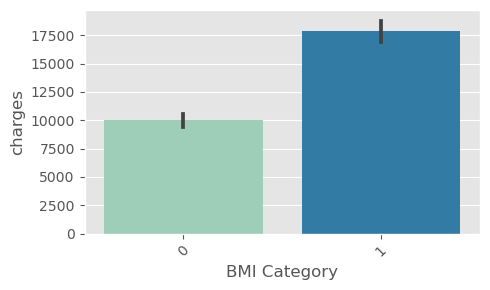

In [83]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.barplot(x='BMI Category', y='charges', palette='YlGnBu', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.xticks(fontsize=10)  # Increase x-axis label font size
plt.tight_layout()  # This should be called as a function

# Show plot
plt.show()

C:\Users\sahas\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


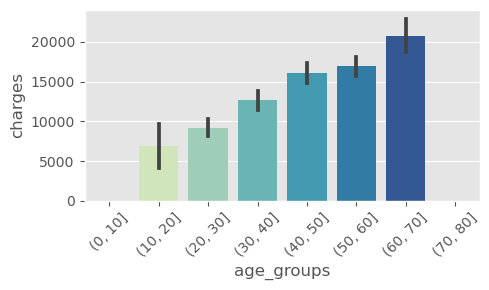

In [82]:
plt.figure(figsize=(5, 3))
plt.style.use('ggplot')

sns.barplot(x='age_groups', y='charges', palette='YlGnBu', data=Df)
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.xticks(fontsize=10)  # Increase x-axis label font size
plt.tight_layout()  # This should be called as a function

# Show plot
plt.show()

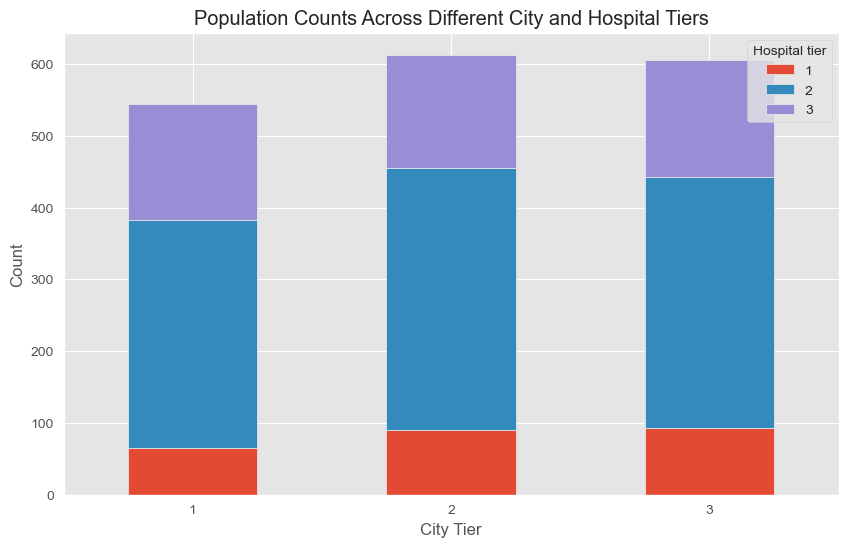

In [120]:
# Stacked bar chart to visualize population counts across different city and hospital tiers
city_tier_counts = Df.groupby(['City tier', 'Hospital tier']).size().unstack()
city_tier_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.title('Population Counts Across Different City and Hospital Tiers')
plt.xticks(rotation=0)
plt.show()

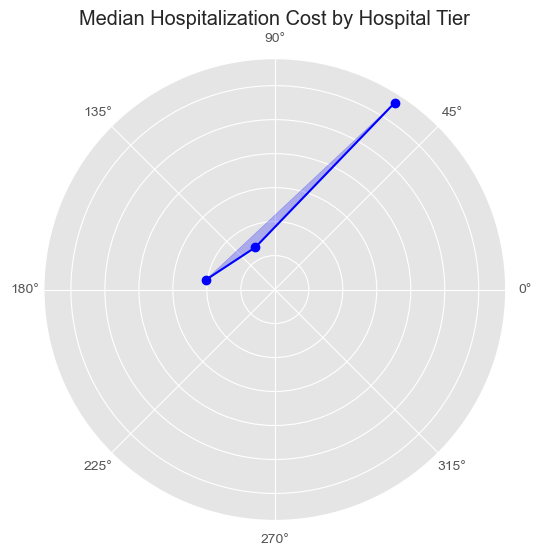

In [127]:
# Radar chart for median hospitalization cost by hospital tier
median_costs = Df.groupby('Hospital tier')['charges'].median()
categories = list(median_costs.index)
values = median_costs.values

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(categories, values, marker='o', linestyle='-', color='b')
ax.fill(categories, values, color='b', alpha=0.25)
ax.set_yticklabels([])
plt.title('Median Hospitalization Cost by Hospital Tier')
plt.show()

In [167]:
median_costs_hos = Df.groupby('Hospital tier')['charges'].median()
categories = list(median_costs.index)
values_hos = median_costs.values

categories, values_hos

([1, 2, 3], array([32694.155,  6846.1  , 10226.28 ]))

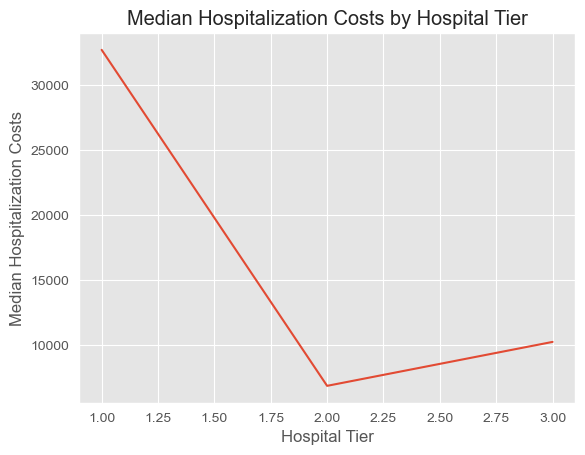

In [168]:
plt.plot(categories, values_hos)

# Adding labels and title
plt.xlabel('Hospital Tier')
plt.ylabel('Median Hospitalization Costs')
plt.title('Median Hospitalization Costs by Hospital Tier')
plt.show()


In [166]:
median_costs_city  = Df.groupby('City tier')['charges'].median()
categories = list(median_costs_city.index)
values_city = median_costs_city.values

categories, values_city

([1, 2, 3], array([9160.82 , 8515.76 , 9341.075]))

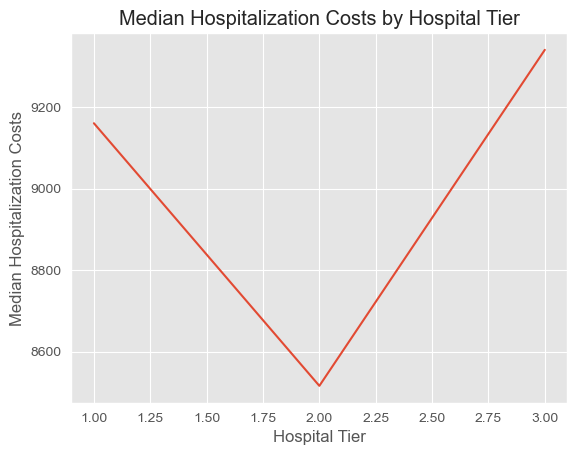

In [169]:
plt.plot(categories, values_city)

# Adding labels and title
plt.xlabel('Hospital Tier')
plt.ylabel('Median Hospitalization Costs')
plt.title('Median Hospitalization Costs by Hospital Tier')
plt.show()

In [ ]:
#13. Test the following null hypotheses:
#a) The average hospitalization costs for the three types of hospitals are not significantly different.
# b) The average hospitalization costs for the three types of cities are not significantly different.
# c) The average hospitalization cost for smokers is not significantly different from the average cost for 
#nonsmokers.
# d) Smoking and heart issues are independent.


In [171]:
costs_smokers = Df.groupby('smoker')['charges'].mean()
smoker_categories = list(costs_smokers.index)
cost_smoker =costs_smokers.values

smoker_categories, cost_smoker

([0, 1], array([ 7792.0368806 , 33378.02498818]))

In [172]:

#13. Test the following null hypotheses:
#a) The average hospitalization costs for the three types of hospitals are not significantly different.
from scipy.stats import f_oneway

# Extracting charges for each hospital tier
hospital_tier_1 = Df[Df['Hospital tier'] == 1]['charges']
hospital_tier_2 = Df[Df['Hospital tier'] == 2]['charges']
hospital_tier_3 = Df[Df['Hospital tier'] == 3]['charges']

# Performing ANOVA test
f_statistic, p_value = f_oneway(hospital_tier_1, hospital_tier_2, hospital_tier_3)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in average hospitalization costs for the three types of hospitals.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in average hospitalization costs for the three types of hospitals.")

            

F-statistic: 380.8708076607199
P-value: 3.5861829606687107e-138
Reject the null hypothesis: There are significant differences in average hospitalization costs for the three types of hospitals.


In [174]:
#13. Test the following null hypotheses:
# b) The average hospitalization costs for the three types of cities are not significantly different.

from scipy.stats import f_oneway

# Extracting charges for each city tier
City_tier_1 = Df[Df['City tier'] == 1]['charges']
City_tier_2 = Df[Df['City tier'] == 2]['charges']
City_tier_3 = Df[Df['City tier'] == 3]['charges']

# Performing ANOVA test
f_statistic, p_value = f_oneway(City_tier_1, City_tier_2, City_tier_3)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in average hospitalization costs for the three types of Cities.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in average hospitalization costs for the three types of Cities.")


F-statistic: 1.1449308407444325
P-value: 0.3184828423616402
Fail to reject the null hypothesis: There are no significant differences in average hospitalization costs for the three types of Cities.


In [175]:
#13. Test the following null hypotheses:
#The average hospitalization cost for smokers is not significantly different from the average cost for 
#nonsmokers.
from scipy.stats import f_oneway

# Extracting charges for smokers and non smokers
smoker_exp = Df[Df['smoker'] == 0]['charges']
nonsmoker_exp = Df[Df['smoker'] == 1]['charges']


# Performing ANOVA test
f_statistic, p_value = f_oneway(smoker_exp, nonsmoker_exp)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in hospitalization costs between smokers and nonsmokers.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in hospitalization costs between smokers and nonsmokers.")


F-statistic: 5057.887180517754
P-value: 0.0
Reject the null hypothesis: There are significant differences in hospitalization costs between smokers and nonsmokers.


In [176]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(Df['smoker'], Df['Heart Issues'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Smoking and heart issues are dependent.")
else:
    print("Fail to reject the null hypothesis: Smoking and heart issues are independent.")


Chi-square statistic: 0.0005865323722074358
P-value: 0.9806783770890726
Fail to reject the null hypothesis: Smoking and heart issues are independent.


In [177]:
contingency_table

Heart Issues,0,1
smoker,,
0,808,532
1,256,167


In [ ]:
#Summary of EDA
Hospitalization charges are greatly affected by following variables 
1.if a patient is Smoker charges are higher
2. higher the age higher are the charges
3. higher the BMI higher are charges
4. hospital tier does affect the charges
5. Charges do not change between cities.

In [ ]:
##Machine Learning
#1. Examine the correlation between predictors to identify highly correlated predictors
 #2. Develop a linear or ridge regression model. Evaluate the model with k-fold cross-validation. Also, 
#ensure that you apply all the following suggestions:
 #• Implement the stratified 5-fold cross-validation technique for both model building and validation
 #• Utilize effective standardization techniques and hyperparameter tuning
 #• Incorporate sklearn-pipelines to streamline the workflow
 #• Apply appropriate regularization techniques to address the bias-variance trade-off
 #• Create five folds in the data and introduce a variable to identify the folds
 #• Develop the Gradient Boost model, determine the variable importance scores, and identify the 
#redundant variables


In [70]:
Df['Gender'] = Df['Gender'].astype('int')
Df['NumberOfMajorSurgeries'] = Df['NumberOfMajorSurgeries'].astype('int')

Df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1763 entries, 0 to 2334
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1763 non-null   object 
 1   year                    1763 non-null   int32  
 2   month                   1763 non-null   object 
 3   date                    1763 non-null   int64  
 4   children                1763 non-null   int64  
 5   charges                 1763 non-null   float64
 6   Hospital tier           1763 non-null   int64  
 7   City tier               1763 non-null   int64  
 8   State ID                1763 non-null   int64  
 9   BMI                     1763 non-null   float64
 10  HBA1C                   1763 non-null   float64
 11  Heart Issues            1763 non-null   int64  
 12  Any Transplants         1763 non-null   int64  
 13  Cancer history          1763 non-null   int64  
 14  NumberOfMajorSurgeries  1763 non-null   int32

C:\Users\sahas\AppData\Local\Temp\ipykernel_11200\2394238126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Gender'] = Df['Gender'].astype('int')
C:\Users\sahas\AppData\Local\Temp\ipykernel_11200\2394238126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['NumberOfMajorSurgeries'] = Df['NumberOfMajorSurgeries'].astype('int')


In [71]:
Df.to_csv('Df.csv', index=False)

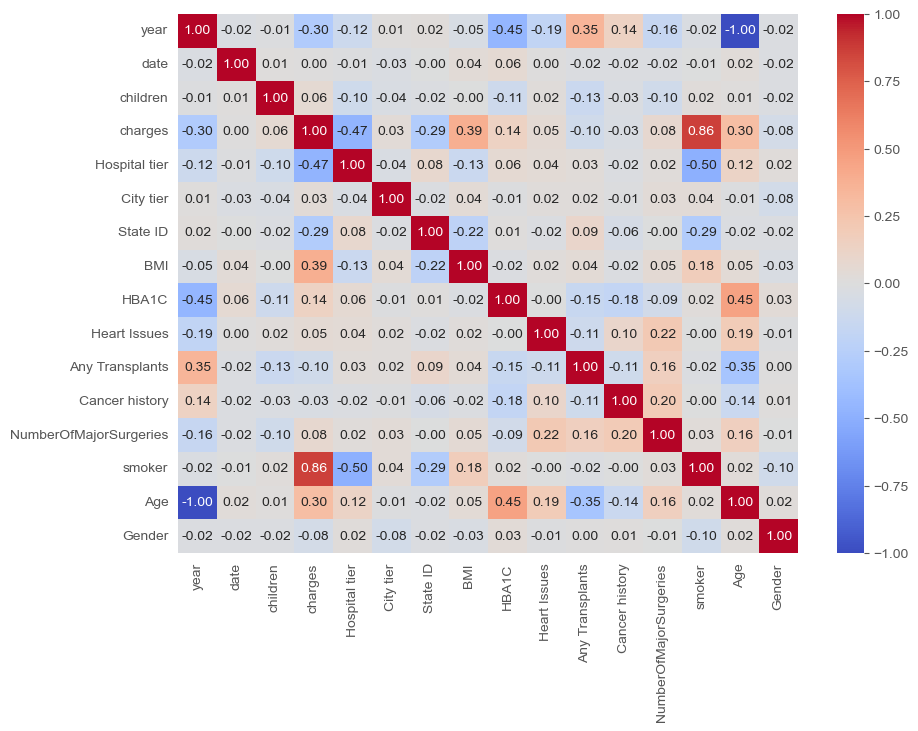

In [169]:
correlation_testdata = Df.corr(numeric_only = True)
from matplotlib import pyplot as plt
import seaborn as sns
corelation_matrix = Df.corr(numeric_only=True)
plt.figure(figsize =(10,7))
heatmap = sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Observation
1.#basedon corelation matrix
#There is multi colllinearity between variables 
#like BMI, Heart issues, transplants HBA1C counts. Need to be cogniscent while building a model.


In [150]:
#2. Develop a linear model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


Df_x = Df.drop(columns =['year','date','children', 'City tier', 'charges','age_bins', 'month','name', 'Customer ID'], axis ='columns')

Df_x



,Hospital tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,Gender
0,2,3,17.580,4.51,0,0,0,1,0,32,1
1,2,3,17.600,4.39,0,0,0,1,0,32,1
2,2,3,16.470,6.35,0,0,1,1,0,31,2
3,3,3,17.700,6.28,0,0,0,1,0,32,1
4,3,3,22.340,5.57,0,0,0,1,0,26,1
...,...,...,...,...,...,...,...,...,...,...,...
2329,1,1,32.800,6.59,0,0,0,0,1,62,1
2330,1,2,35.530,5.45,0,0,0,0,1,35,2
2332,1,2,34.485,11.87,1,0,0,2,1,54,1
2333,2,3,30.360,5.77,0,0,0,0,1,47,1


In [118]:
y = Df['charges']

y

0         563.84
1         570.62
2         600.00
3         604.54
4         637.26
          ...   
2329    52590.83
2330    55135.40
2332    60021.40
2333    62592.87
2334    63770.43
Name: charges, Length: 1763, dtype: float64

In [119]:
lr_model = LinearRegression() 

In [120]:
X_train, X_test, y_train, y_test = train_test_split(Df_x, y , test_size =.2)

In [172]:
lr =lr_model.fit(X_train,y_train )

In [173]:
lr.score(X_train, y_train)


0.8757135717135494

In [174]:
#r2
lr.score(X_test, y_test)

0.8769785890849712

In [73]:
mse = mean_squared_error(y_test, y_lrpredict)
print(f"Mean Squared Error: {mse}")


NameError: name 'mean_squared_error' is not defined

In [138]:
# Calculating the R-squared value
r2 = r2_score(y_test, y_lrpredict)

print(r2)

0.8769785890849712


In [176]:
from sklearn.linear_model import Ridge

alphas =[.1,1.0,10]
rid_model = RidgeCV(alpha =alphas, max_tier =1000, tol=.1 cv=5)
rid_model.fit(X_train, y_train)
rid_model.score

In [142]:
# Linear Regression model is only predicting with 87% accuracy the hospitalization costs. Lets see if accuracy improves using K fold validation

from sklearn.model_selection import KFold, cross_val_score
# Set up k-fold cross-validation
k=5
kf =KFold(n_splits =k, shuffle = True, random_state = 42 )



In [156]:
# Evaluate the model using cross-validation
scores = cross_val_score(lr_model, Df_x, y, cv=kf, scoring='r2') 

scores

array([0.89371914, 0.85751535, 0.88052444, 0.86452579, 0.87004875])

In [207]:
scores.mean()

0.8732666938859353

In [170]:
#since there is multi collinearity identifying VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Features"] = Df_x.columns
vif["VIF"] = [variance_inflation_factor(Df_x.values, i) for i in range(Df_x.shape[1])] 

vif

,Features,VIF
0,Hospital tier,12.429667
1,State ID,6.340145
2,BMI,9.817081
3,HBA1C,12.027198
4,Heart Issues,1.820423
5,Any Transplants,1.373845
6,Cancer history,1.348773
7,NumberOfMajorSurgeries,2.344185
8,smoker,1.675408
9,Age,17.076738


In [167]:
#2 Develop a linear or ridge regression model.
#Implement the stratified 5-fold cross-validation technique for both model building and validation 
# this not a classification problem hence nor using the stratified 5-fold cross
#validation technique but using the K fold method.



In [184]:
# 2 bullet 4 Apply appropriate regularization techniques to address the bias-variance trade-off
#using ridge regression model to address the multicollinearity issue with the predictors

from sklearn.linear_model import Ridge

rid_model = Ridge(alpha =50,max_iter =100, tol =.001)

rid_model.fit(X_train, y_train)





Ridge(alpha=50, max_iter=100, tol=0.001)

In [185]:
rid_model.score(X_train, y_train)

0.8577948384984722

In [186]:
rid_model.score(X_test, y_test)

0.8626692947527372

In [210]:

from sklearn.linear_model import RidgeCV

alphas =[.1,1.0,10.0]

ridcv_model = RidgeCV(alphas =alphas, cv=5)

ridcv_model.fit(Df_x, y)



RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [211]:
Best_alpha = ridcv_model.alpha_

Best_alpha

0.1

In [72]:
y_ridcv_pred = ridcv_model.predict(X_test)

y_ridcv_pred

NameError: name 'ridcv_model' is not defined

In [213]:
ridcv_model.score(X_test, y_test)

0.8772392857450804

In [214]:
# the linear regression model scored .8753 and the linear regression with ridge technique didn't do better either the 
#r2 score .8769. let try the Gridsearch models to check if we ge better fit  

In [ ]:
# using GridsearchCV for hypertuning

In [2]:
from sklearn.model_selection import GridSearchCV


In [3]:
from sklearn.svm import SVR

In [4]:
clf=GridSearchCV(SVR(kernel ='linear'), {'C': [1], 'gamma' : ['auto']}, cv =2)

In [5]:
clf.fit(Df_x, y)



NameError: name 'Df_x' is not defined